In [71]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Loading the dataset into a data frame
df_fd_nona_fd = pd.read_csv('../data/fashion dataset.csv')
df_fd_nona_bd = pd.read_csv('../data/fashion brand details.csv')

In [ ]:
df_fd_nona_fd.head(10)

In [ ]:
df_fd_nona_bd.head(10)

In [ ]:
df_fd_nona_fd.tail(10)

In [ ]:
df_fd_nona_fd.tail(10)

In [ ]:
#Check for empty rows
df_fd_nona_fd.isna().all(axis=1).sum()

In [ ]:
#Dropping all empty rows
df_fd_nona_fd.dropna(axis=0, how='all', inplace=True)
df_fd_nona_fd.isna().all(axis=1).sum()

In [ ]:
df_fd_nona_bd.isna().all(axis=1).sum()

In [ ]:
df_fd_nona_fd.reset_index(drop=True, inplace=True)

In [ ]:
df_fd_nona_fd_desc = df_fd_nona_fd[['p_id','description']]
df_fd_nona_fd_p_attributes = df_fd_nona_fd[['p_attributes']]


In [ ]:
print(df_fd_nona_fd_p_attributes.head(2))
print(df_fd_nona_fd_desc.head(2))

In [ ]:
df_fd_nona_fd.drop(['description'], axis = 1, inplace = True)
df_fd_nona_fd.drop(['p_attributes'], axis = 1, inplace = True)
df_fd_nona_fd.head(5)

In [ ]:
def split_feature(df_fd_nona):
    series = df_fd_nona.iloc[:,0]
    options = {}
    empty_id = []
    # Iterate over the column
    # for id, values  in series[series.notnull()].items():
    for id, values  in series.items():
    # Break each value into list of options
    # print(id, values)
        if type(values) == str:
            for key, value in eval(values).items():
                
                # Add the option as a column to result
                if not key in options.keys():
                    options[key] = [np.nan for x in range(df_fd_nona.shape[0])]#create a new column if it doesnt exist and set all value under it to empty
                # Mark the value in the option column as True
                options[key][id] = value
        else:
            empty_id.append(id)
        
    for x in range(len(empty_id)):
        for key in options.keys():
            options[key][empty_id[x]] = np.nan
                
    return pd.DataFrame(data = options)

In [ ]:
# calling the spliting function
df_fd_nona_fd_p_split = split_feature(df_fd_nona_fd_p_attributes)
df_fd_nona_fd_p_split.head(2)

In [ ]:
#merging the fashion dataset dataframe with the splitted dataframe
df_fd_nona_fd_full = pd.concat([df_fd_nona_fd, df_fd_nona_fd_p_split], axis=1, ignore_index = False)
df_fd_nona_fd_full.head(2)

In [ ]:
pd.options.display.max_rows = 120
pd.options.display.max_columns = 50

In [ ]:
df_fd_nona_fd_full.isnull().sum()
df_fd_nona_fd_full.nunique()

In [ ]:
def column_to_drop(df_fd_nona, threshold):
    # Set the threshold for the number of empty values
    # 60% empty values

    # Get the number of rows in the dataframe
    num_rows = df_fd_nona.shape[0]

    # Calculate the number of empty values in each column
    null_counts = df_fd_nona.isnull().sum()

    # Calculate the percentage of empty values in each column
    null_percentages = null_counts / num_rows

    # Get the names of the columns with empty values above the threshold
    columns_to_drop = null_percentages[null_percentages > threshold].index

    # Print the names of the columns
    return columns_to_drop
print(column_to_drop(df_fd_nona_fd_full, 0.6))

In [ ]:
#Adjusted the columns_to_drop to remove fabric types
#We move fabric type because it was specified in multiple. we plan to merge this column with each other.
columns_to_drop = ['Hemline', 'Hood', 'Pocket', 'Bottom Fabric', 'Bottom Pattern',
       'Dupatta Border', 'Dupatta Fabric', 'Dupatta Pattern', 'Kurta Fabric',
       'Kurta Pattern', 'Ornamentation', 'Set Content', 'Stitch', 'Technique',
       'Add-Ons', 'Brand Fit Name', 'Features', 'Fit', 'Fly Type',
       'Multipack Set', 'Type of Pleat', 'Waist Rise', 'Weave Type',
       'Distress', 'Effects', 'Fade', 'Reversible', 'Shade',
       'Stretch', 'Type of Distress', 'Waistband', 'Center Front Open',
       'Lining', 'Sleeve Styling', 'Transparency',
       'taxMaterial', 'Front Styling', 'Knit or Woven', 'Sport', 'Technology',
       'Blouse Closure', 'Blouse Fabric', 'Choli Stitch', 'Dupatta',
       'Lehenga Closure', 'Lehenga Fabric', 'Lehenga Lining Fabric',
       'Lehenga Stitch', 'Regions', 'Style Tip', 'Top Pattern',
       'Where-to-wear', 'Bottom Closure', 'Bottom Type', 'Top Fabric',
       'Top Type', 'Trends', 'Blouse', 'Border', 'Care for me', 'Saree Fabric',
       'Collar', 'Lining Fabric', 'Pattern Coverage', 'Slit Detail',
       'Top Design Styling', 'Top Hemline', 'Top Length', 'Top Shape',
       'Weave Pattern', 'Design Styling', 'Shape', 'Sport Team',
       'Technology Present', 'Sub Trend', 'Wedding', 'Fabric Purity',
       'Fusion Wear', 'Pattern Size',
       'Contact Brand or Retailer for pre-sales product queries',
       'Colour Family', 'Collection Name', 'Better Cotton Initiative',
       'About the Brand', 'How to care for your denim',
       'What it does for your body']
print(len(columns_to_drop))

In [ ]:
df_fd_nona_fd_full.drop(columns_to_drop, axis=1, inplace=True)
df_fd_nona_fd_full.shape

##### List of data to data to use for modelling.

df_fd_nona_fd_full,
df_fd_nona_bd,
df_fd_nona_fd_desc

In [ ]:
df_fd_nona_fd_full.head(2)

In [ ]:
df_fd_nona_fd_full.drop(['Body or Garment Size'], axis=1, inplace=True)
df_fd_nona_fd_full.head(2)

In [ ]:
def combine_similar_column(df_fd_nona, *args):

    # Specify the columns to include in the loop
    columns = args
    # new_values = [np.nan for x in range(df_fd_nona.shape[0])]
    # Iterate over the rows of the dataframe
    for index, row in df_fd_nona.iterrows():
        row_values = set()
    # Iterate over the specified columns of the row
        modes = []
        for col in columns:
            # Print the value of the current cell
            if not pd.isnull(row[col]): 
                row_values.add(row[col])
                
        lst =list(row_values)
        if lst:
            # Create a dictionary to store the frequency of each element
            freq = {}

            # Iterate over the list
            for elem in lst:
                # Increment the frequency of the element
                if elem in freq:
                    freq[elem] += 1
                else:
                    freq[elem] = 1

            # Find the highest frequency
            max_freq = max(freq.values())

            # Get the element(s) with the highest frequency
            modes = [k for k, v in freq.items() if v == max_freq]
        else:
            modes =[np.nan]
        # new_values[]
        df_fd_nona.loc[index, args[0]] = modes[0]
        

combine_similar_column(df_fd_nona_fd_full, 'Fabric', 'Fabric 2', 'Fabric 3', 'Fabric Type')
        
        

In [ ]:
df_fd_nona_fd_full.loc[:,'Fabric'].isnull().sum()

In [ ]:
df_fd_nona_fd_full.drop(['Fabric 2', 'Fabric 3', 'Fabric Type'], axis=1, inplace=True)
df_fd_nona_fd_full

In [ ]:
lst = list(df_fd_nona_fd_full['Body Shape ID'].items())
print(lst[:5])
df_fd_nona_fd_full.loc[0, 'Body Shape ID']

In [ ]:
def process_body_shape_id(df_fd_nona, col):

    # Iterate over the values in the column
    for index, value in list(df_fd_nona[col].items()):
        if pd.isnull(value):
            df_fd_nona.loc[index, col] = np.nan
        else:
            lst = value.split(',')
            lst.sort()
            result = ','.join(lst)
            df_fd_nona.loc[index, col] = result

process_body_shape_id(df_fd_nona_fd_full, 'Body Shape ID')

In [ ]:
lst = list(df_fd_nona_fd_full['Body Shape ID'].items())
print(lst[:5])
df_fd_nona_fd_full['Body Shape ID'].nunique()

In [ ]:
df_fd_nona_fd_full.info()

In [ ]:
df_fd_nona = df_fd_nona_fd_full.dropna(subset=['ratingCount', 'avg_rating'])
print(df_fd_nona.shape)
print(df_fd_nona_fd_full.shape)

In [ ]:
# Convert datatypes to the correct types
df_fd_nona['p_id'] = df_fd_nona['p_id'].astype('str')
df_fd_nona['price'] = df_fd_nona['price'].astype('int')
df_fd_nona['ratingCount'] = df_fd_nona['ratingCount'].astype('int')


In [ ]:
df_fd_nona.info()

In [ ]:
df_fd_nona.loc[:,'avg_rating'] = np.round(df_fd_nona.loc[:,'avg_rating'], 2)
df_fd_nona

In [ ]:
def get_unique(df_fd_nona):
  unique_dict = {}
  for col in df_fd_nona.columns:
    # Get the unique values in the column
    uniques = df_fd_nona[col].unique()
    unique_dict[col] = uniques
    
    # Print the column name and the list of unique values
    # print(f"{col}: {uniques}")
  for key, value in unique_dict.items():
    print(f"{key}: {value}")
get_unique(df_fd_nona)

In [ ]:
df_fd_nona.columns

In [ ]:
df_fd_nona.rename(columns={'ratingCount': 'rating_count', 'Print or Pattern Type': 'pat_type', 'Body Shape ID': 'shape', 'Number of Pockets': 'pockets', 'Body Shape ID': 'shape', 'Sleeve Length': 'slev_len', 'Surface Styling': 'surf_style', 'Wash Care': 'wash_care', 'Main Trend': 'trend'}, inplace=True)
df_fd_nona


In [60]:
for col in df_fd_nona.columns:
    if df_fd_nona.dtypes[col] == 'object':
        df_fd_nona[col].fillna('NS', inplace=True)
    # elif df_fd_nona.dtypes[col] == 'object' and col in ['Pattern']:
    #     for index, row in df_fd_nona.iterrows():
    #         if pd.isnull(row[col]) and row['pat_type'] == 'NA': 
    #             row[col] = 'Plain'
    # elif df_fd_nona.dtypes[col] == 'object' and col in ['pat_type']:
    #     for index, row in df_fd_nona.iterrows():
    #         if pd.isnull(row[col]) and (row['Pattern'] != 'NA' or not pd.isnull(row['Pattern'])):
    #             row[col] = 'NS'

/tmp/ipykernel_3446/1368799643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fd_nona[col].fillna('NS', inplace=True)


In [61]:
df_fd_nona

,p_id,name,price,colour,brand,rating_count,avg_rating,Occasion,Pattern,pat_type,shape,Closure,Fabric,Length,Neck,pockets,slev_len,surf_style,Type,wash_care,Character,trend,Sustainable
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899,White,Dupatta Bazaar,1321,4.55,Daily,Embroidered,Floral,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199,Mustard,Roadster,5462,4.31,Casual,Solid,Solid,"324,424,443",Zip,Cotton,Regular,Hood,2,Long Sleeves,NA,Front-Open,Machine Wash,NS,NS,NS
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799,Peach,Inddus,145,4.07,Daily,NS,Ethnic Motifs,NS,NS,NS,NS,NS,NS,NS,NS,NS,Dry Clean,NS,NS,NS
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499,Black,SASSAFRAS,9124,4.15,Casual,Solid,Solid,424,Slip-On,NA,Regular,NS,NA,NS,NS,Regular Trousers,Machine Wash,NA,New Basics,Regular
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999,Black,Kotty,12260,4.08,Casual,NS,NS,NS,Button and Zip,Cotton,Cropped,NS,4,NS,NS,NS,Machine Wash,NS,NS,NS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14291,14173362.0,STREET 9 Black Puff Sleeves Blouson Crop Pleat...,1999,Black,STREET 9,106,4.27,Casual,Solid,Solid,"333,424",Concealed Zip,Satin,Crop,Round Neck,NS,Long Sleeves,Gathered or Pleated,Blouson,Machine Wash,NA,New Basics,Regular
14294,17122946.0,Moda Rapido Women Blue Straight Fit High-Rise ...,2299,Blue,Moda Rapido,8,4.62,Casual,NS,NS,NS,Button and Zip,Cotton,Regular,NS,5,NS,NS,NS,Machine Wash,NA,NA,Regular
14302,14235030.0,Indo Era Women Black Floral Printed Pure Cotto...,3499,Black,Indo Era,12,4.58,Festive,NS,Floral,"333,424",NS,NS,NS,Mandarin Collar,1,Three-Quarter Sleeves,NS,NS,Dry Clean,NA,NA,Regular
14304,16835446.0,Allen Solly Woman Women Blue Skinny Fit Jeans,1999,Blue,Allen Solly Woman,49,4.35,Casual,NS,NS,NS,Button and Zip,Cotton,Regular,NS,5,NS,NS,NS,Machine Wash,NA,NA,Regular


In [65]:
df_fd_nona.drop_duplicates(inplace=True)
df_fd_nona

/tmp/ipykernel_3446/1067380047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fd_nona.drop_duplicates(inplace=True)


,p_id,name,price,colour,brand,rating_count,avg_rating,Occasion,Pattern,pat_type,shape,Closure,Fabric,Length,Neck,pockets,slev_len,surf_style,Type,wash_care,Character,trend,Sustainable
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899,White,Dupatta Bazaar,1321,4.55,Daily,Embroidered,Floral,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199,Mustard,Roadster,5462,4.31,Casual,Solid,Solid,"324,424,443",Zip,Cotton,Regular,Hood,2,Long Sleeves,NA,Front-Open,Machine Wash,NS,NS,NS
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799,Peach,Inddus,145,4.07,Daily,NS,Ethnic Motifs,NS,NS,NS,NS,NS,NS,NS,NS,NS,Dry Clean,NS,NS,NS
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499,Black,SASSAFRAS,9124,4.15,Casual,Solid,Solid,424,Slip-On,NA,Regular,NS,NA,NS,NS,Regular Trousers,Machine Wash,NA,New Basics,Regular
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999,Black,Kotty,12260,4.08,Casual,NS,NS,NS,Button and Zip,Cotton,Cropped,NS,4,NS,NS,NS,Machine Wash,NS,NS,NS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14291,14173362.0,STREET 9 Black Puff Sleeves Blouson Crop Pleat...,1999,Black,STREET 9,106,4.27,Casual,Solid,Solid,"333,424",Concealed Zip,Satin,Crop,Round Neck,NS,Long Sleeves,Gathered or Pleated,Blouson,Machine Wash,NA,New Basics,Regular
14294,17122946.0,Moda Rapido Women Blue Straight Fit High-Rise ...,2299,Blue,Moda Rapido,8,4.62,Casual,NS,NS,NS,Button and Zip,Cotton,Regular,NS,5,NS,NS,NS,Machine Wash,NA,NA,Regular
14302,14235030.0,Indo Era Women Black Floral Printed Pure Cotto...,3499,Black,Indo Era,12,4.58,Festive,NS,Floral,"333,424",NS,NS,NS,Mandarin Collar,1,Three-Quarter Sleeves,NS,NS,Dry Clean,NA,NA,Regular
14304,16835446.0,Allen Solly Woman Women Blue Skinny Fit Jeans,1999,Blue,Allen Solly Woman,49,4.35,Casual,NS,NS,NS,Button and Zip,Cotton,Regular,NS,5,NS,NS,NS,Machine Wash,NA,NA,Regular


In [69]:
df_fd_nona.reset_index(drop=True, inplace=True)
df_fd_nona

,p_id,name,price,colour,brand,rating_count,avg_rating,Occasion,Pattern,pat_type,shape,Closure,Fabric,Length,Neck,pockets,slev_len,surf_style,Type,wash_care,Character,trend,Sustainable
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899,White,Dupatta Bazaar,1321,4.55,Daily,Embroidered,Floral,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS,NS
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199,Mustard,Roadster,5462,4.31,Casual,Solid,Solid,"324,424,443",Zip,Cotton,Regular,Hood,2,Long Sleeves,NA,Front-Open,Machine Wash,NS,NS,NS
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799,Peach,Inddus,145,4.07,Daily,NS,Ethnic Motifs,NS,NS,NS,NS,NS,NS,NS,NS,NS,Dry Clean,NS,NS,NS
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499,Black,SASSAFRAS,9124,4.15,Casual,Solid,Solid,424,Slip-On,NA,Regular,NS,NA,NS,NS,Regular Trousers,Machine Wash,NA,New Basics,Regular
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999,Black,Kotty,12260,4.08,Casual,NS,NS,NS,Button and Zip,Cotton,Cropped,NS,4,NS,NS,NS,Machine Wash,NS,NS,NS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6533,14173362.0,STREET 9 Black Puff Sleeves Blouson Crop Pleat...,1999,Black,STREET 9,106,4.27,Casual,Solid,Solid,"333,424",Concealed Zip,Satin,Crop,Round Neck,NS,Long Sleeves,Gathered or Pleated,Blouson,Machine Wash,NA,New Basics,Regular
6534,17122946.0,Moda Rapido Women Blue Straight Fit High-Rise ...,2299,Blue,Moda Rapido,8,4.62,Casual,NS,NS,NS,Button and Zip,Cotton,Regular,NS,5,NS,NS,NS,Machine Wash,NA,NA,Regular
6535,14235030.0,Indo Era Women Black Floral Printed Pure Cotto...,3499,Black,Indo Era,12,4.58,Festive,NS,Floral,"333,424",NS,NS,NS,Mandarin Collar,1,Three-Quarter Sleeves,NS,NS,Dry Clean,NA,NA,Regular
6536,16835446.0,Allen Solly Woman Women Blue Skinny Fit Jeans,1999,Blue,Allen Solly Woman,49,4.35,Casual,NS,NS,NS,Button and Zip,Cotton,Regular,NS,5,NS,NS,NS,Machine Wash,NA,NA,Regular


         p_id                                               name  price  \
0   1518329.0   Dupatta Bazaar White Embroidered Chiffon Dupatta    899   
1   5829334.0  Roadster Women Mustard Yellow Solid Hooded Swe...   1199   
2  10340119.0  Inddus Peach-Coloured & Beige Unstitched Dress...   5799   
3  10856380.0            SASSAFRAS Women Black Parallel Trousers   1499   
4  12384822.0  Kotty Women Black Wide Leg High-Rise Clean Loo...   1999   

    colour           brand  rating_count  avg_rating Occasion      Pattern  \
0    White  Dupatta Bazaar          1321        4.55    Daily  Embroidered   
1  Mustard        Roadster          5462        4.31   Casual        Solid   
2    Peach          Inddus           145        4.07    Daily           NS   
3    Black       SASSAFRAS          9124        4.15   Casual        Solid   
4    Black           Kotty         12260        4.08   Casual           NS   

        pat_type        shape         Closure  Fabric   Length  Neck pockets  \


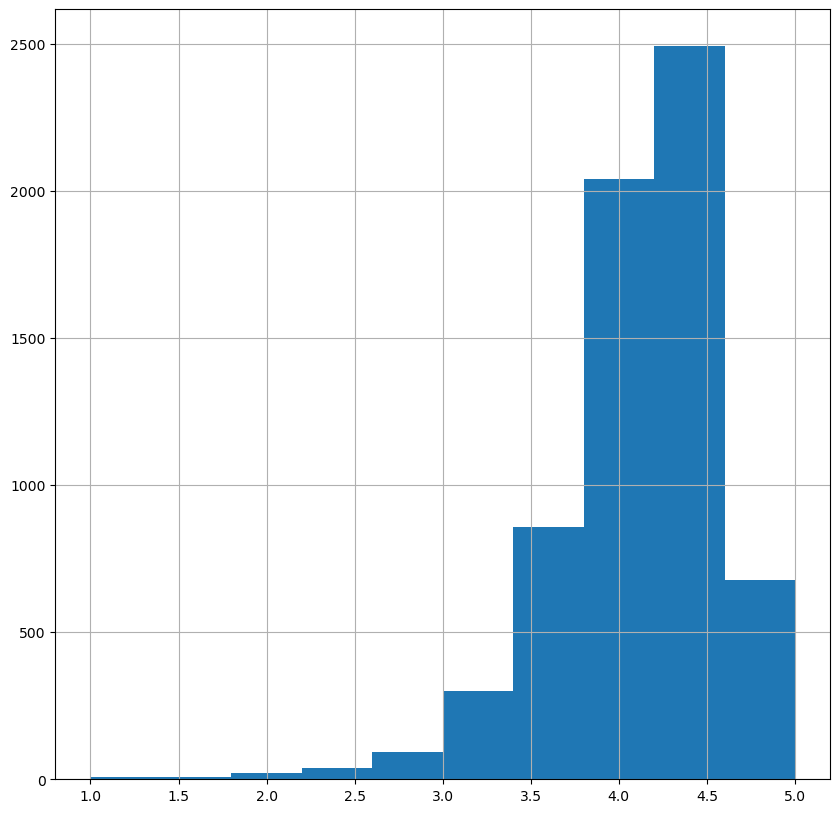

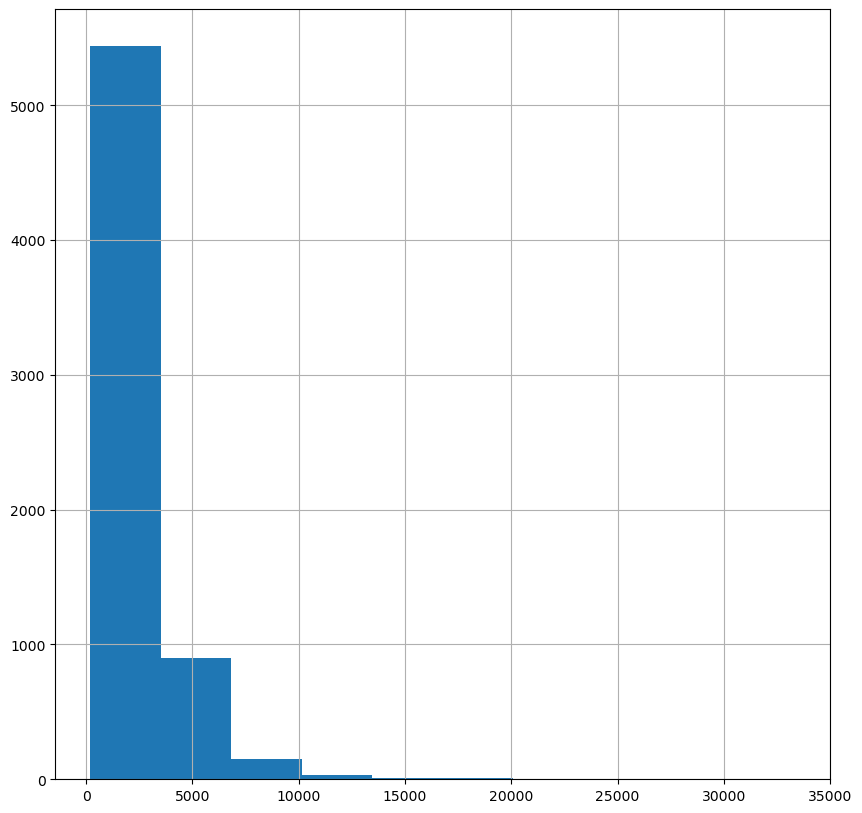

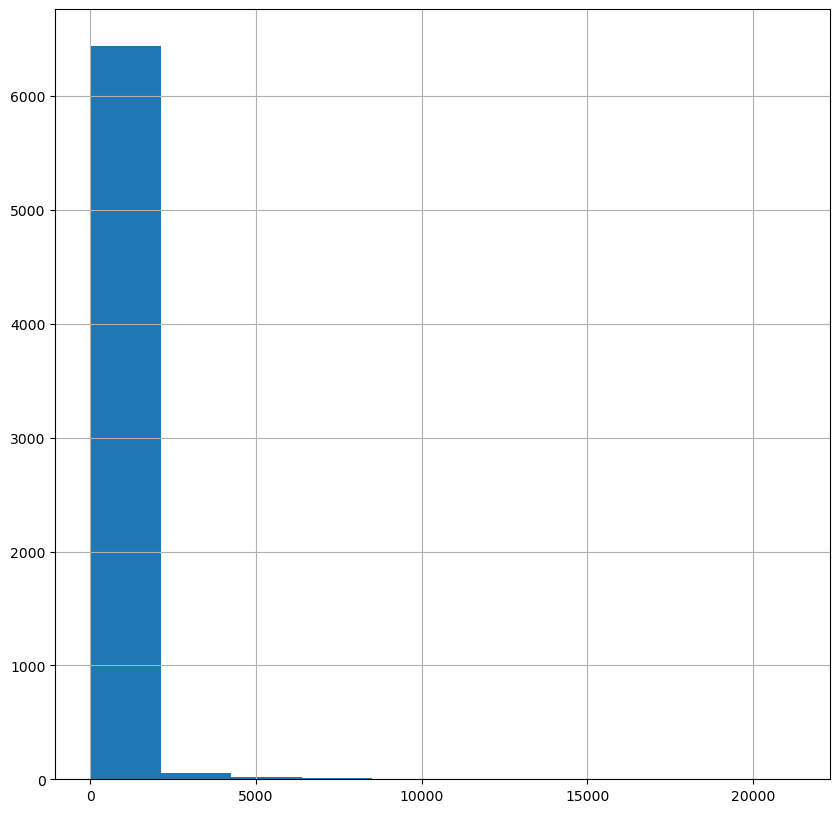

In [79]:
print(df_fd_nona.head())

# Calculate summary statistics for each column
print(df_fd_nona.describe())

# Plot histograms for each numerical column
df_fd_nona['avg_rating'].hist(figsize=(10, 10))
plt.show()
df_fd_nona['price'].hist(figsize=(10, 10))
plt.show()
df_fd_nona['rating_count'].hist(figsize=(10, 10))
plt.show()


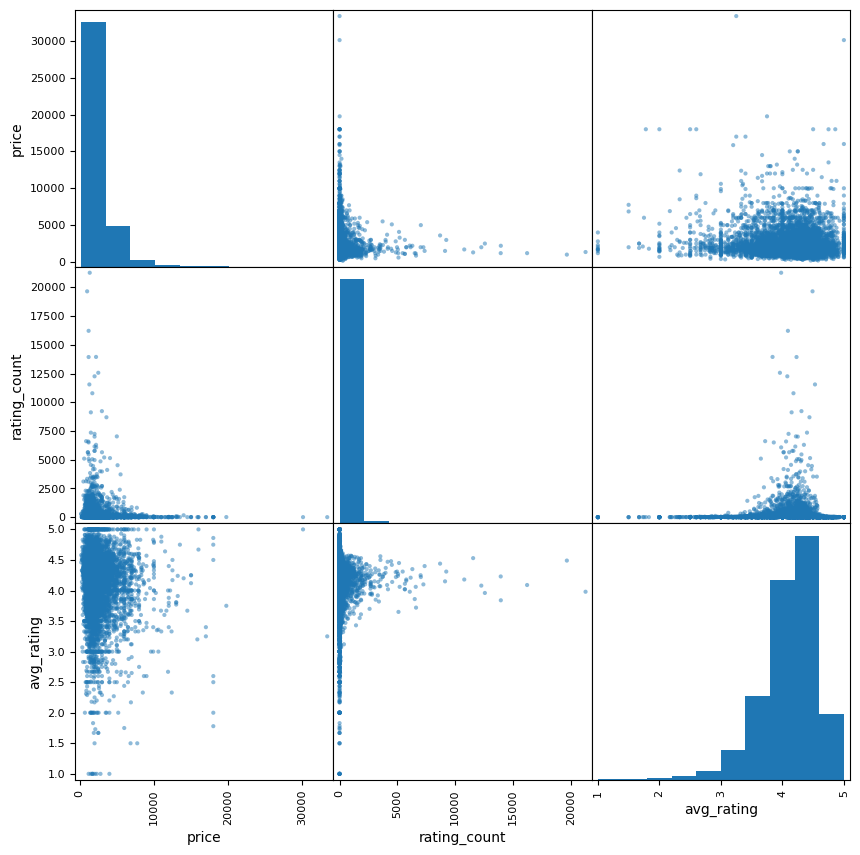

In [80]:
pd.plotting.scatter_matrix(df_fd_nona, figsize=(10, 10))
plt.show()

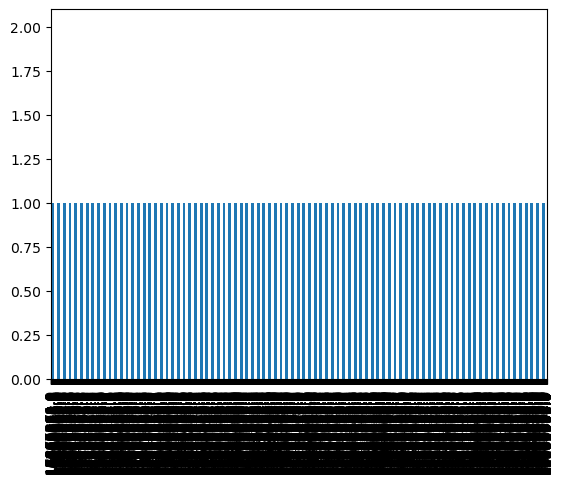

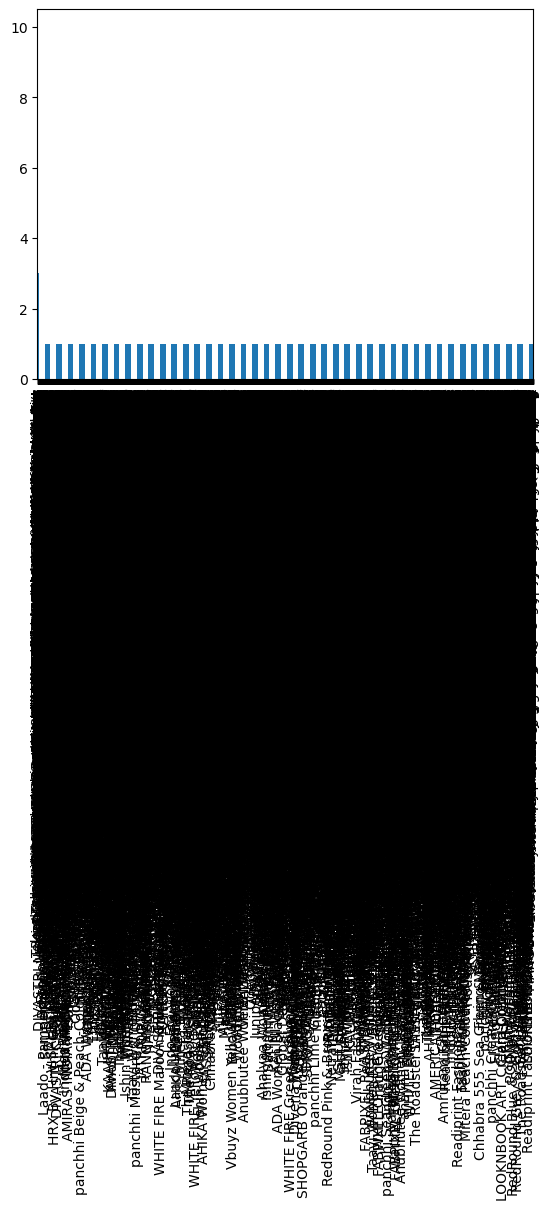

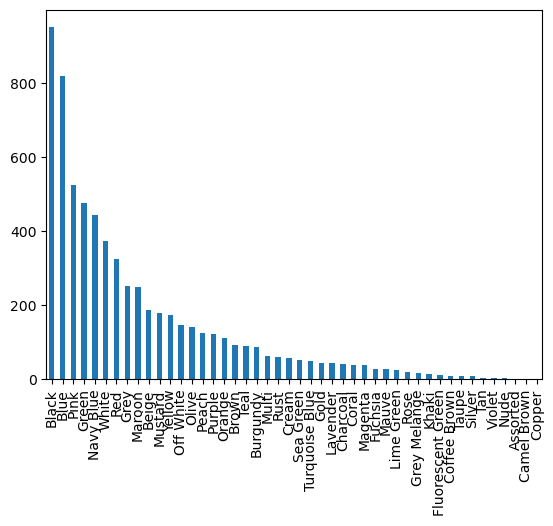

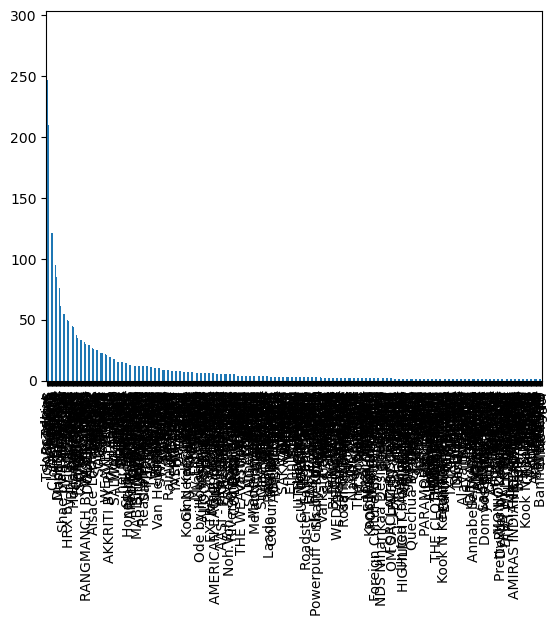

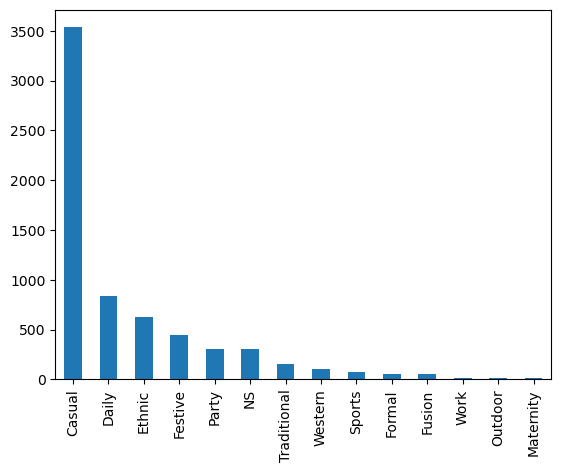

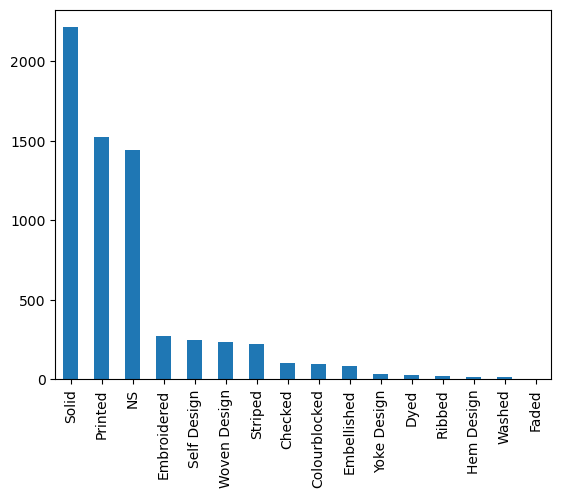

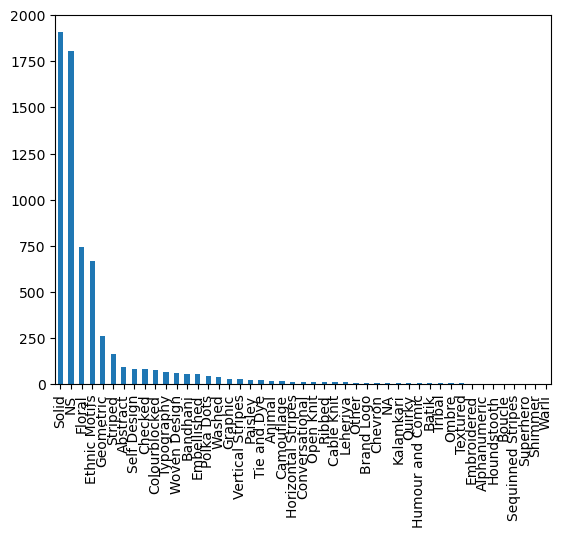

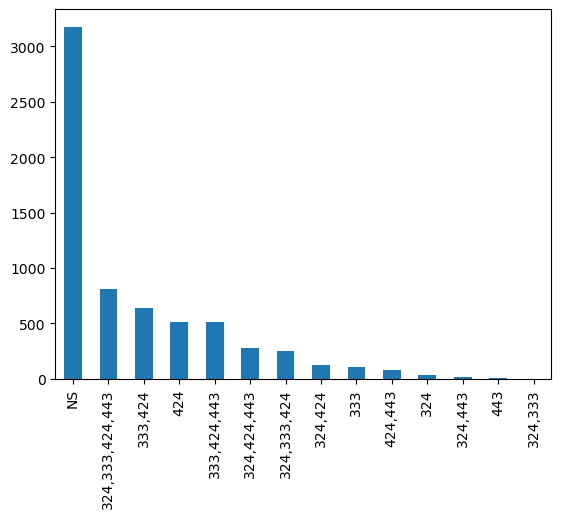

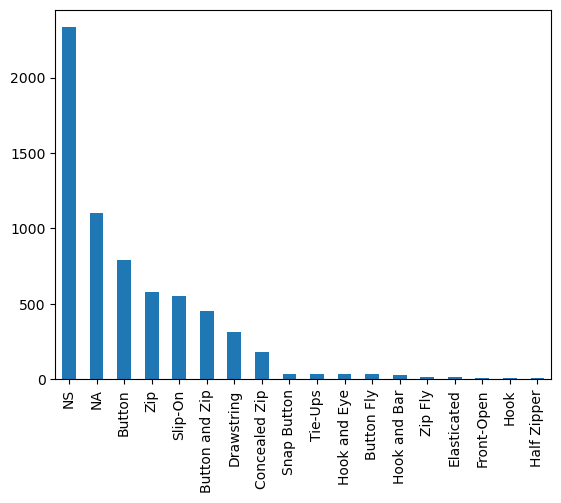

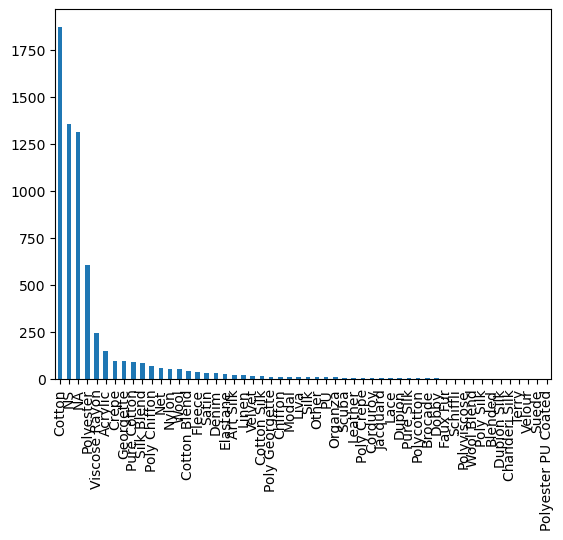

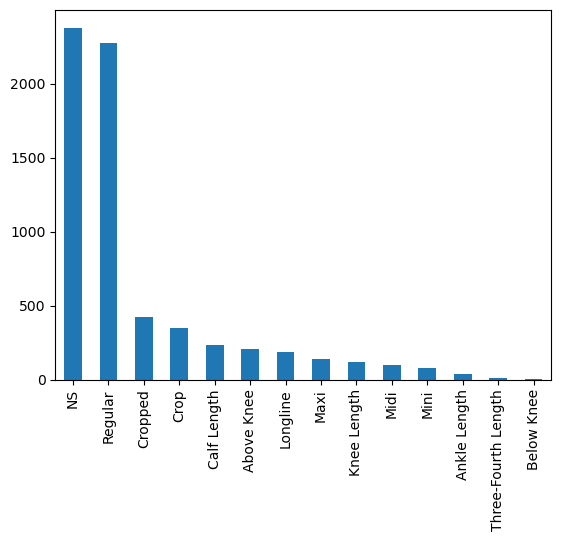

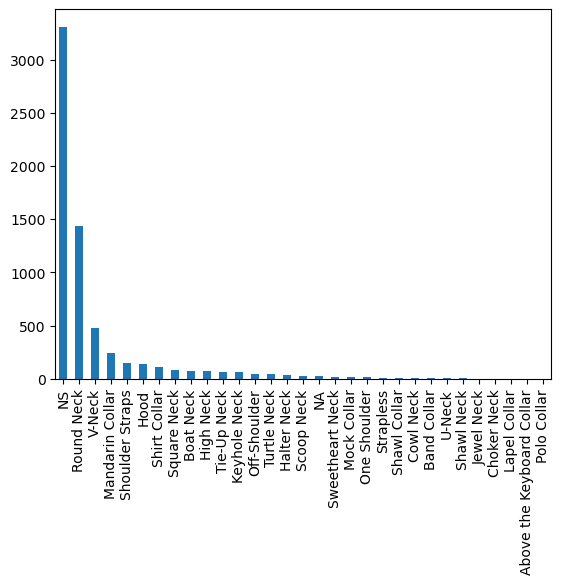

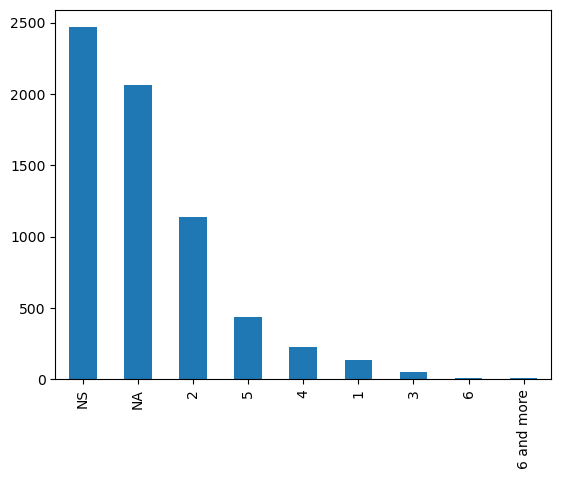

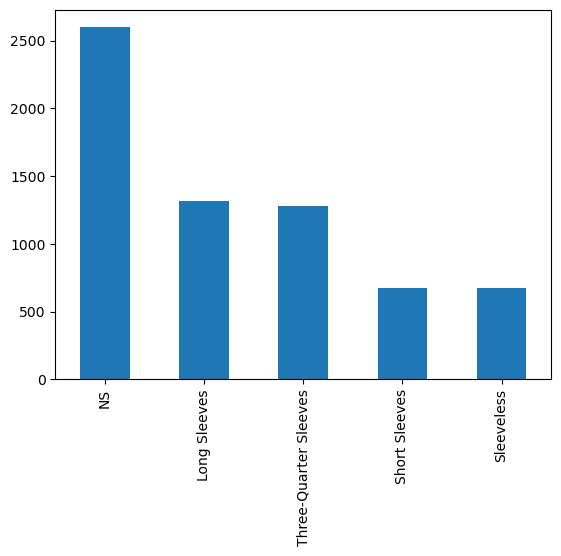

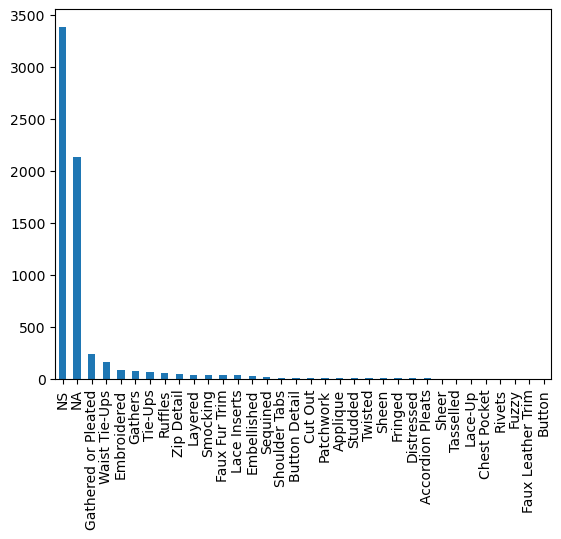

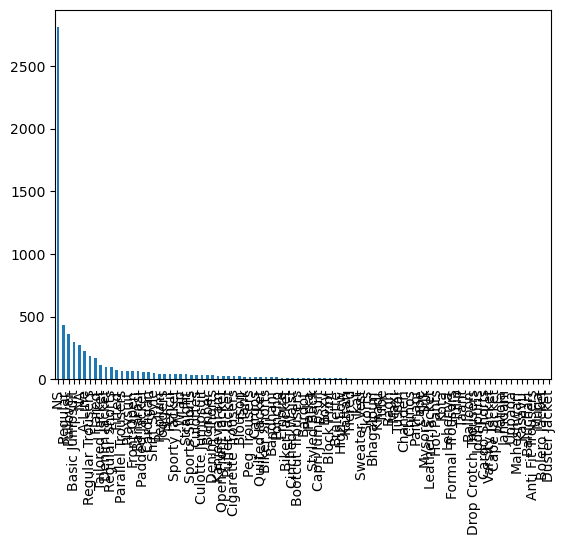

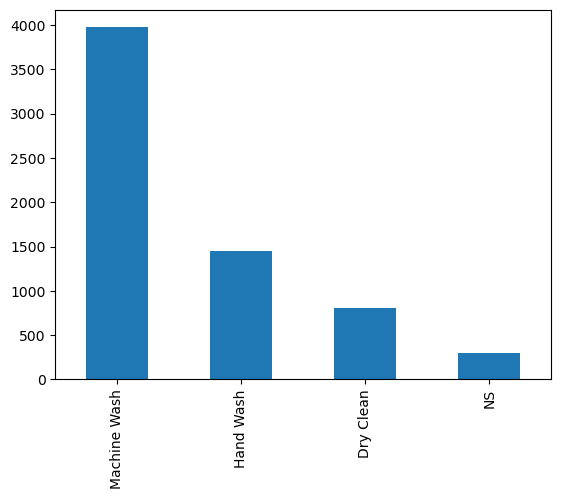

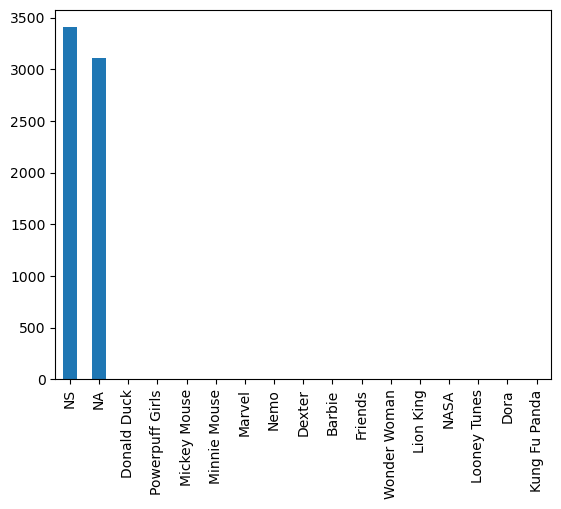

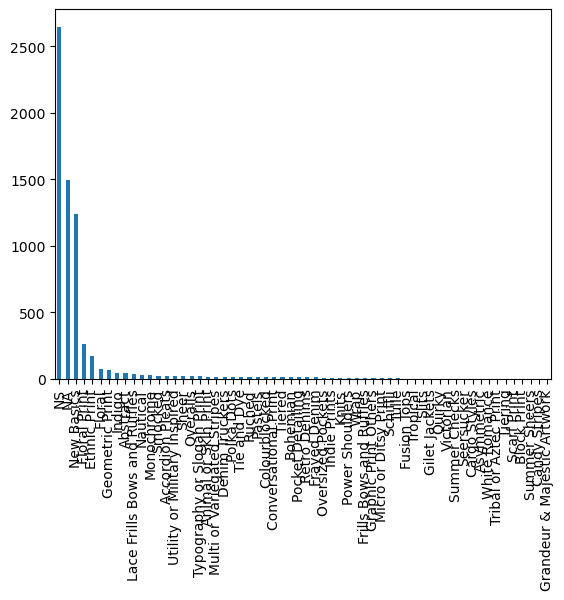

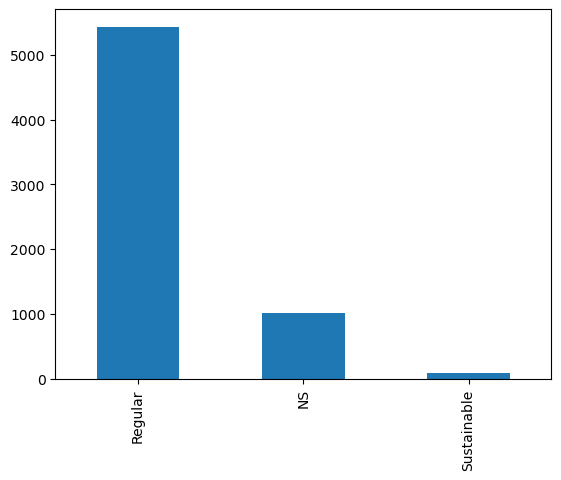

In [81]:
# Plot bar plots for each categorical column
for column in df_fd_nona.select_dtypes(include='object'):
    df_fd_nona[column].value_counts().plot(kind='bar')
    plt.show()

In [82]:
df_fd_nona.columns

Index(['p_id', 'name', 'price', 'colour', 'brand', 'rating_count',
       'avg_rating', 'Occasion', 'Pattern', 'pat_type', 'shape', 'Closure',
       'Fabric', 'Length', 'Neck', 'pockets', 'slev_len', 'surf_style', 'Type',
       'wash_care', 'Character', 'trend', 'Sustainable'],
      dtype='object')